In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 200)

## Read and load data

##### Loading the Application data  from csv

In [3]:
applicationData = pd.read_csv("application_data.csv", encoding="unicode_escape")

#### Inspecting Application_Data dataframe (shape, info, describe etc.) 

In [4]:
applicationData.size

37516342

In [5]:
applicationData.shape

(307511, 122)

In [6]:
applicationData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
applicationData.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [8]:
applicationData.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Column wise null percentages

#### Inspecting the Application_Data dataframe. Calculating the null percentages in each column

In [9]:
#Calculating the column wise null percentages and roundinng off to 2 decimal places
def getColumnWiseNulls():
    colWiseNulls = round(100*(applicationData.isnull().sum()/len(applicationData.index)), 2)
    colWiseNulls.sort_values(ascending=False, inplace=True)
    return colWiseNulls

In [10]:
def plotColumnWiseNulls(lowerRange=0, upperRange=100):
    res = getColumnWiseNulls()
    plt.figure(figsize=(20,4))
    res[(res>=lowerRange)&(res<=upperRange)].plot.bar()

In [16]:
applicationData_Null = getColumnWiseNulls()
applicationData_Null

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_MEDI        69.43
NONLIVINGAPARTMENTS_AVG         69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MEDI           68.35
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
FLOORSMIN_MEDI                  67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_AVG                   67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_AVG                 66.50
YEARS_BUILD_MODE                66.50
OWN_CAR_AGE                     65.99
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
LANDAREA_MEDI                   59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MEDI              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

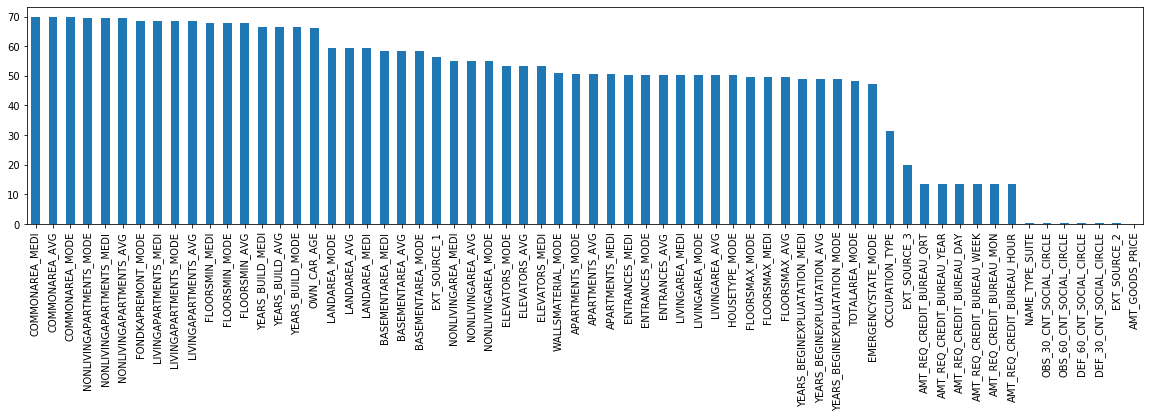

In [12]:
plotColumnWiseNulls(0.01)

### Handling column wise Null values 
#### Clearly, this dataframe has a high null percentages for a number of columns. Removing all the columns having null percentage greater than 50.

In [17]:
#Get the list of columns that need to be dropped (Null percent > 50)
Cols_To_Drop = list(applicationData_Null[applicationData_Null.values>=50].index)
applicationData.drop(labels=Cols_To_Drop, inplace=True , axis=1)
len(Cols_To_Drop)

41

In [18]:
#Verify if the required columns have been dropped
applicationData.shape

(307511, 81)

    As observed, 81 columns remain. Hence, 122 - 81 = 41 columns have been dropped

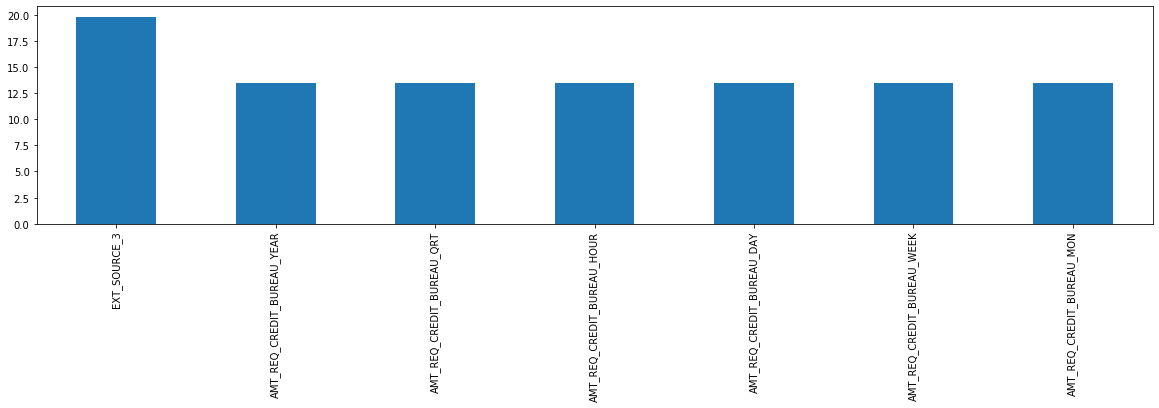

In [30]:
plotColumnWiseNulls(10, 30) ##only plot columns with null values between 10% and 30%

### Imputing values in columns

#### For columns with small null percentages, say less than 15%, we will impute some value

In [48]:
applicationData_Null = getColumnWiseNulls()
applicationData_Null[(applicationData_Null>0)&(applicationData_Null<15)]

AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
NAME_TYPE_SUITE                0.42
DEF_60_CNT_SOCIAL_CIRCLE       0.33
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
EXT_SOURCE_2                   0.21
AMT_GOODS_PRICE                0.09
dtype: float64

#### AMT_REQ_CREDIT_BUREAU_HOUR

In [49]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_HOUR'].describe())
applicationData['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

##### Since both median and mode are 0, it is safe to fill nulls with 0. Mean cannot work out here since the number of enquiries cannot be fractional

In [50]:
applicationData.loc[applicationData['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull(),'AMT_REQ_CREDIT_BUREAU_HOUR']=0

In [59]:
#Verify the changes
applicationData['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

0

#### For imputing columns AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK , AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR following logic is being used.

    we have computed a metric (median/mode) for each column. Specific selection of metric is mentioned near the code for selection

    after that we select max of the queries made during a smaller time period or the metric selected in above step. For example - for AMT_REQ_CREDIT_BUREAU_WEEK, we have computed the median value, but if there are any queries made during last day and if that number is more than median, we choose that number as those queries are part of the week.

In [56]:
# generic function to impute based on above logic
import math
def fillNaForCreditInquries(row,currentColumn, previousColumn, altValue):
    if math.isnan(row[currentColumn]):
        res = max(row[previousColumn], altValue)
    else:
        res=  row[currentColumn]
    return res

#### AMT_REQ_CREDIT_BUREAU_DAY

In [57]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_DAY'].describe())

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


In [60]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum())

41519


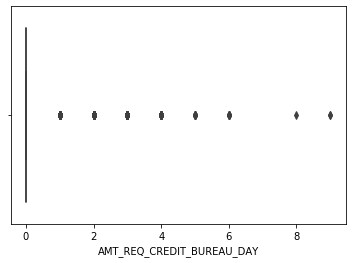

In [61]:
sns.boxplot(x='AMT_REQ_CREDIT_BUREAU_DAY', data=applicationData)

In [63]:
# For imputation we use daily data. If hourly review is available and greater than 0 we use that else we impute with median/mode(both are 0)
applicationData['AMT_REQ_CREDIT_BUREAU_DAY'] = applicationData.apply(fillNaForCreditInquries, axis=1, args=('AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 0))
print(applicationData['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum())

0


#### AMT_REQ_CREDIT_BUREAU_WEEK 

In [64]:
applicationData['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [65]:
applicationData['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()

41519

In [66]:
applicationData['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(normalize=True)*100

0.0    96.790881
1.0     3.085807
2.0     0.074814
3.0     0.021805
4.0     0.012782
6.0     0.007519
5.0     0.003760
8.0     0.001880
7.0     0.000752
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

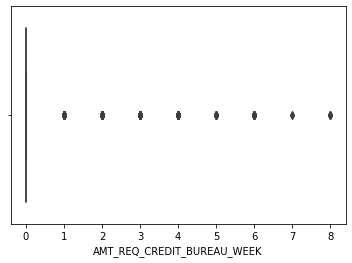

In [67]:
sns.boxplot(x='AMT_REQ_CREDIT_BUREAU_WEEK', data=applicationData)

In [69]:
# For imputation we use weekly data. If daily review is available and greater than 0 we use that else we impute with median/mode
applicationData['AMT_REQ_CREDIT_BUREAU_WEEK'] = applicationData.apply(fillNaForCreditInquries, axis=1, args=('AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY', 0))
applicationData['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()

0

#### AMT_REQ_CREDIT_BUREAU_MON 

In [70]:
applicationData['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [71]:
applicationData['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()

41519

In [72]:
applicationData['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

    values greater than 11 can be considered outliers as the number of values are considerably low

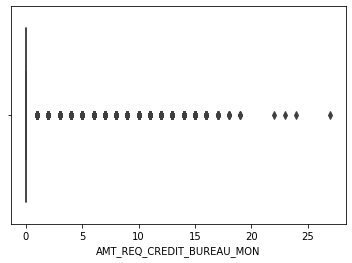

In [73]:
sns.boxplot(x='AMT_REQ_CREDIT_BUREAU_MON', data=applicationData)

In [74]:
applicationData['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()

41519

In [75]:
# For imputation we use monthly data. If weekly is available and greater than 0 we use that else we impute with median/mode
applicationData['AMT_REQ_CREDIT_BUREAU_MON'] = applicationData.apply(fillNaForCreditInquries, axis=1, args=('AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK', 0))
applicationData['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()

0

#### AMT_REQ_CREDIT_BUREAU_QRT 

In [76]:
applicationData['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [77]:
applicationData['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()

41519

In [78]:
applicationData['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

    Values of 19, 261 is a clear outlier. Also there is only 1 record each with such values hence we can consider deleting or capping it later

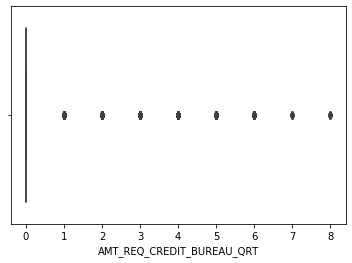

In [79]:
sns.boxplot(x='AMT_REQ_CREDIT_BUREAU_QRT', data=applicationData[applicationData['AMT_REQ_CREDIT_BUREAU_QRT']<19])

In [80]:
# For imputation we use quarterly data. If monthly review is available and greater than 0 we use that else we impute with median/mode
applicationData['AMT_REQ_CREDIT_BUREAU_QRT'] = applicationData.apply(fillNaForCreditInquries, axis=1, args=('AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_MON', 0))
applicationData['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()

0

## Subset Dataframe 
#### Subsetting the applicationData dataframe to get relevant 30 columns as per our understanding for further analysis.

    Selected the following columns:
    1. SK_ID_CURR
    2. TARGET
    3. NAME_CONTRACT_TYPE
    4. CODE_GENDER
    5. FLAG_OWN_REALTY
    6. CNT_CHILDREN
    7. AMT_INCOME_TOTAL
    8. AMT_CREDIT
    9. AMT_ANNUITY
    10. NAME_INCOME_TYPE
    11. NAME_EDUCATION_TYPE
    12. NAME_FAMILY_STATUS
    13. REGION_POPULATION_RELATIVE
    14. DAYS_BIRTH
    15. DAYS_EMPLOYED
    16. FLAG_MOBIL
    17. FLAG_CONT_MOBILE
    18. OCCUPATION_TYPE
    19. CNT_FAM_MEMBERS
    20. REGION_RATING_CLIENT_W_CITY
    21. WEEKDAY_APPR_PROCESS_START
    22. REG_REGION_NOT_LIVE_REGION
    23. ORGANIZATION_TYPE
    24. EXT_SOURCE_2
    25. DEF_30_CNT_SOCIAL_CIRCLE
    26. DAYS_LAST_PHONE_CHANGE
    27. FLAG_DOCUMENT_2
    28. FLAG_DOCUMENT_3
    29. AMT_REQ_CREDIT_BUREAU_HOUR
    30. AMT_REQ_CREDIT_BUREAU_WEEK

In [82]:
#Subsetting the Application_Data dataframe toget the required columns
required_Columns = ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY',
                   'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_INCOME_TYPE',
                   'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
                   'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
                   'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
                   'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
                   'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_WEEK']

revised_Application_Data = applicationData[required_Columns]

In [83]:
#Verfiy Revised dataframe after subsetting
revised_Application_Data.shape

(307511, 30)

#### Checking the data types of selected columns in Revised_Application_Data

In [85]:
revised_Application_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 30 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
REGION_POPULATION_RELATIVE     307511 non-null float64
DAYS_BIRTH                     307511 non-null int64
DAYS_EMPLOYED                  307511 non-null int64
FLAG_MOBIL                     307511 non-null int64
FLAG_CONT_MOBILE           

<font color="blue">As observed, following columns have incorrect data types:</font>
    1. CNT_FAM_MEMBERS (Float) should be int64
    2. DEF_30_CNT_SOCIAL_CIRCLE (Float) should be int64
    3. DAYS_LAST_PHONE_CHANGE (Float) should be int64
    4. AMT_REQ_CREDIT_BUREAU_HOUR (Float) should be int64
    5. AMT_REQ_CREDIT_BUREAU_WEEK (Float) should be int64

### Fixing to correct data type of columns

In [88]:
#Fixing the data type for CNT_FAM_MEMBERS, DEF_30_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE,
#AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_WEEK
revised_Application_Data.CNT_FAM_MEMBERS = revised_Application_Data.CNT_FAM_MEMBERS.astype('Int64')
revised_Application_Data.DEF_30_CNT_SOCIAL_CIRCLE = revised_Application_Data.DEF_30_CNT_SOCIAL_CIRCLE.astype('Int64')
revised_Application_Data.DAYS_LAST_PHONE_CHANGE = revised_Application_Data.DAYS_LAST_PHONE_CHANGE.astype('Int64')
revised_Application_Data.AMT_REQ_CREDIT_BUREAU_HOUR = revised_Application_Data.AMT_REQ_CREDIT_BUREAU_HOUR.astype('Int64')
revised_Application_Data.AMT_REQ_CREDIT_BUREAU_WEEK = revised_Application_Data.AMT_REQ_CREDIT_BUREAU_WEEK.astype('Int64')

In [89]:
#Verify the changes in our Revised_Application_Data
revised_Application_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 30 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
REGION_POPULATION_RELATIVE     307511 non-null float64
DAYS_BIRTH                     307511 non-null int64
DAYS_EMPLOYED                  307511 non-null int64
FLAG_MOBIL                     307511 non-null int64
FLAG_CONT_MOBILE           

<font color="blue">Data types of the following columns have been fixed:</font>
    1. CNT_FAM_MEMBERS - int64
    2. DEF_30_CNT_SOCIAL_CIRCLE - int64
    3. DAYS_LAST_PHONE_CHANGE - int64
    4. AMT_REQ_CREDIT_BUREAU_HOUR - int64
    5. AMT_REQ_CREDIT_BUREAU_WEEK - int64

## Outlier Handling
#### CNT_CHILDREN

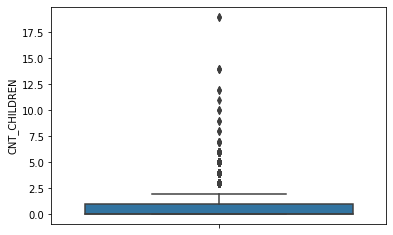

In [91]:
#We will boxplot nuerical type columns and observe for outliers

#Outlier Handling for CNT_CHILDREN
sns.boxplot(y = revised_Application_Data.CNT_CHILDREN, data = revised_Application_Data)

In [92]:
revised_Application_Data.CNT_CHILDREN.value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [93]:
revised_Application_Data.CNT_CHILDREN.quantile([0.75, 0.90, 0.99])

0.75    1.0
0.90    2.0
0.99    3.0
Name: CNT_CHILDREN, dtype: float64

### As observed, 99 percentile of data have 3 children and there are only a few data points till 5, so it safe to remove rows with CNT_CHILDREN greater than 5.

In [95]:
#Keeping only those rows where CNT_CHILDREN <= 5
revised_Application_Data = revised_Application_Data[revised_Application_Data.CNT_CHILDREN <= 5]


#Verify the CNT_CHILDREN column again after dropping rows
revised_Application_Data.CNT_CHILDREN.value_counts()

0    215371
1     61119
2     26749
3      3717
4       429
5        84
Name: CNT_CHILDREN, dtype: int64

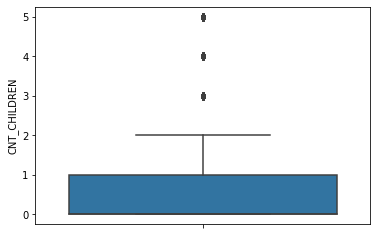

In [97]:
sns.boxplot(y = revised_Application_Data.CNT_CHILDREN.dropna(), data = revised_Application_Data)

#### The above data point observed at CNT_CHILDREN = 3, 4,  5 is not considered as an outlier as it is just a high value for CNT_CHILDREN which is normal

#### AMT_CREDIT

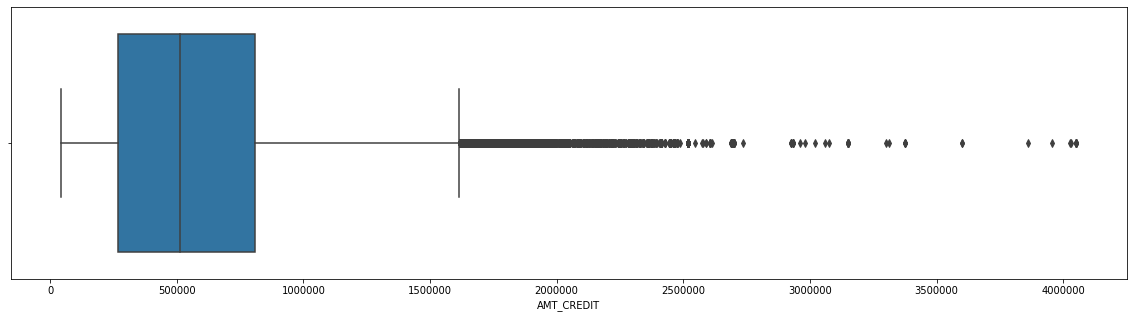

In [99]:
#Outlier Handling for AMT_CREDIT
plt.figure(figsize=[20,5])
sns.boxplot(x = revised_Application_Data.AMT_CREDIT.dropna(), data = revised_Application_Data)
#Graph of derived attribute, ratio of applied/credit - Harnoor

#### REGION_POPULATION_RELATIVE 

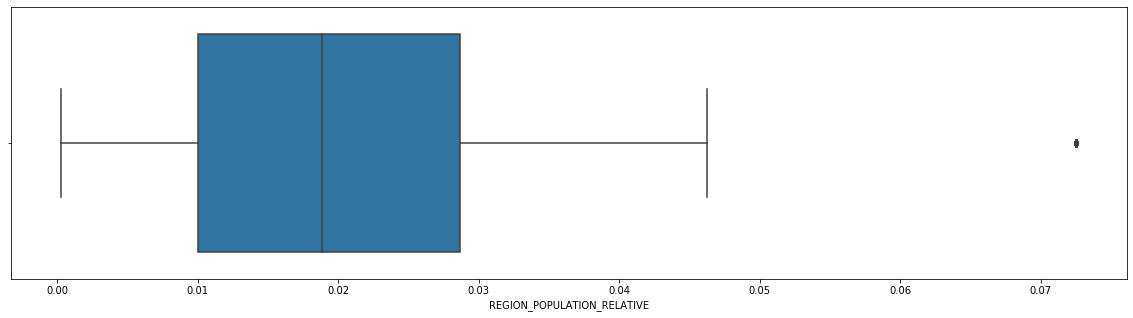

In [100]:
#Outlier Handling for REGION_POPULATION_RELATIVE
plt.figure(figsize=[20,5])
sns.boxplot(x = revised_Application_Data.REGION_POPULATION_RELATIVE.dropna(), data = revised_Application_Data)

In [101]:
revised_Application_Data.REGION_POPULATION_RELATIVE.quantile([0.5, 0.75, 0.90, 0.99])

0.50    0.018850
0.75    0.028663
0.90    0.035792
0.99    0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

In [102]:
#Find the difference between the max value and 99 percentile
revised_Application_Data.REGION_POPULATION_RELATIVE.max() - revised_Application_Data.REGION_POPULATION_RELATIVE.quantile([0.99])
#Imputation required

0.99    0.0
Name: REGION_POPULATION_RELATIVE, dtype: float64

In [103]:
#Counting number of values having REGION_POPULATION_RELATIVE = 0.072508
len(revised_Application_Data.REGION_POPULATION_RELATIVE[revised_Application_Data.REGION_POPULATION_RELATIVE >= 0.072508])


8412

#### The above data point observed at REGION_POPULATION_RELATIVE = 0.072508 is not considered as an outlier as the difference between max and 99 percentile is zero and the count of data points is reltively high, 8397, so the observed data point is considered a high value

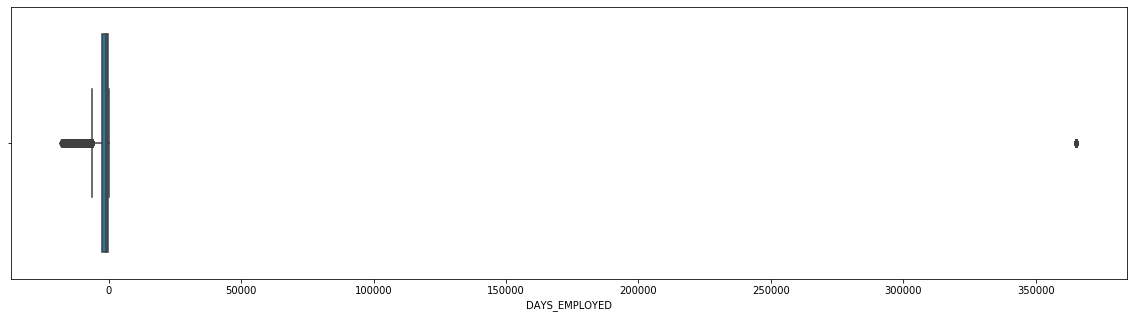

In [104]:
#Outlier Handling for REGION_POPULATION_RELATIVE
plt.figure(figsize=[20,5])
sns.boxplot(x = revised_Application_Data.DAYS_EMPLOYED.dropna(), data = revised_Application_Data)

In [107]:
revised_Application_Data.DAYS_EMPLOYED.value_counts()

 365243    55371
-200         156
-224         152
-230         151
-199         151
           ...  
-11115         1
-11371         1
-11883         1
-13536         1
-8795          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

In [108]:
revised_Application_Data.DAYS_EMPLOYED.quantile([0.5, 0.75, 0.90, 0.99])

0.50     -1213.0
0.75      -289.0
0.90    365243.0
0.99    365243.0
Name: DAYS_EMPLOYED, dtype: float64

In [109]:
#Find the difference between the max value and 99 percentile
revised_Application_Data.DAYS_EMPLOYED.max() - revised_Application_Data.DAYS_EMPLOYED.quantile([0.99])

0.99    0.0
Name: DAYS_EMPLOYED, dtype: float64

In [110]:
#Counting number of values having REGION_POPULATION_RELATIVE = 0.072508
len(revised_Application_Data.DAYS_EMPLOYED[revised_Application_Data.DAYS_EMPLOYED >= 365240])
#Imputation

55371

#### The above data point observed at DAYS_EMPLOYED = 365243 is not considered as an outlier as the difference between max and 99 percentile is zero and the count of data points is reltively high, 55353, so the observed data point is considered a high value

## Creating Bins 

#### AMT_INCOME_TOTAL

In [111]:
revised_Application_Data.AMT_INCOME_TOTAL.value_counts()

135000.0    35747
112500.0    31011
157500.0    26552
180000.0    24716
90000.0     22480
            ...  
101119.5        1
79425.0         1
101128.5        1
202275.0        1
262174.5        1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64

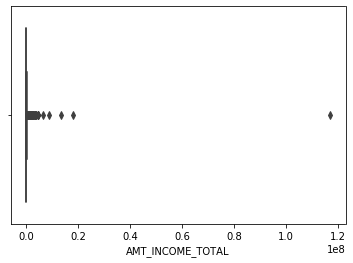

In [113]:
sns.boxplot(revised_Application_Data['AMT_INCOME_TOTAL'])

In [114]:
revised_Application_Data['AMT_INCOME_TOTAL'].describe()

count    3.074690e+05
mean     1.688008e+05
std      2.371377e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [115]:
revised_Application_Data['AMT_INCOME_TOTAL'].quantile([0,.1,.2,.25,.5,.75,.9,.95,.99,1])

0.00        25650.0
0.10        81000.0
0.20        99000.0
0.25       112500.0
0.50       147150.0
0.75       202500.0
0.90       270000.0
0.95       337500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

    Observation
    There is an incremental increase in income ranges. There are some indiviuals with high incomes but those are around 0.1% . Around 20% have income less than 1,00,000. 50% have income less than 1,50,000 75% population has income less than 2,00,000. Similarly there can be division on basis of 50000 income difference.

In [116]:
cut_bins = [0,50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 1000000, 1050000]
cut_labels = [ '<=50k', '50k-1 lac', '1 lac-1.5 lac', '1.5 lac-2 lac','2lac-2.5lac', '2.5lac-3lac', '3lac-3.5lac', '3.5lac-4lac', '4lac-4.5lac', '4.5lac-5lac', '5lac-10lac', '>10lac']
revised_Application_Data['income_bins'] = pd.cut(revised_Application_Data['AMT_INCOME_TOTAL'].clip(upper=1000001), bins=cut_bins,include_lowest =True, labels=cut_labels)
res = revised_Application_Data[['income_bins', 'AMT_INCOME_TOTAL']]

In [117]:
revised_Application_Data['income_bins'].value_counts()

1 lac-1.5 lac    91577
1.5 lac-2 lac    64299
50k-1 lac        59173
2lac-2.5lac      48131
2.5lac-3lac      17038
3lac-3.5lac       8871
3.5lac-4lac       5802
4lac-4.5lac       4924
<=50k             4515
5lac-10lac        2452
4.5lac-5lac        437
>10lac             250
Name: income_bins, dtype: int64

#### DAYS_BIRTH 

In [120]:
revised_Application_Data['DAYS_BIRTH'].value_counts()

-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
          ..
-25032     1
-7956      1
-8001      1
-7861      1
-24894     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64

In [121]:
revised_Application_Data[revised_Application_Data['DAYS_BIRTH']>0]['DAYS_BIRTH'].value_counts()

Series([], Name: DAYS_BIRTH, dtype: int64)

    we have observed that most days are mentioned in -ve. We are converting them to +ve and then convert to years to find age. We will then bin them

In [123]:
revised_Application_Data['DAYS_BIRTH'] = -revised_Application_Data['DAYS_BIRTH'] 

#  use absolute function

revised_Application_Data['AGE'] = round(revised_Application_Data['DAYS_BIRTH']/365, 2)
revised_Application_Data['AGE'].head()

0    25.92
1    45.93
2    52.18
3    52.07
4    54.61
Name: AGE, dtype: float64

In [125]:
revised_Application_Data['AGE'].describe()

count    307469.000000
mean         43.937337
std          11.956622
min          20.520000
25%          34.010000
50%          43.150000
75%          53.920000
max          69.120000
Name: AGE, dtype: float64

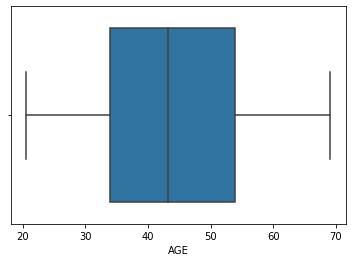

In [126]:
sns.boxplot(revised_Application_Data['AGE'])

In [127]:
revised_Application_Data['AGE'].quantile([0,.1,.2,.25,.5,.75,.9,.95,.99,1])

0.00    20.52
0.10    28.18
0.20    32.04
0.25    34.01
0.50    43.15
0.75    53.92
0.90    60.77
0.95    63.57
0.99    66.90
1.00    69.12
Name: AGE, dtype: float64

    looking at above plot and quantile range values, it is clear that age is very continuously distributed variable. It also seems logical to create bins of size 10

In [128]:
cut_bins = list(range(0,80,10))
cut_bins

[0, 10, 20, 30, 40, 50, 60, 70]

In [129]:
cut_labels = ['<=10', '10-20', '20-30', '30-40', '40-50','50-60', '>60']
revised_Application_Data['AgeGroup'] = pd.cut(revised_Application_Data['AGE'].clip(upper=71), bins=cut_bins,include_lowest =True, labels=cut_labels)
res = revised_Application_Data[['AgeGroup', 'AGE']]

In [130]:
res['AgeGroup'].value_counts()

30-40    82304
40-50    76502
50-60    68064
20-30    45038
>60      35561
10-20        0
<=10         0
Name: AgeGroup, dtype: int64

# Imbalance Percentage 

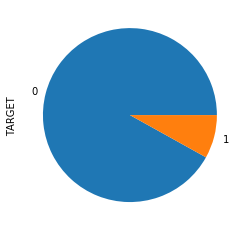

In [131]:
revised_Application_Data.TARGET.value_counts(normalize=True).plot.pie()

In [132]:
revised_Application_Data.TARGET.value_counts(normalize=True) * 100

0    91.928942
1     8.071058
Name: TARGET, dtype: float64

### Subsetting the Revised_Application_Data into Target = 1 and Target = 0 dataframe

In [133]:
#Filtering out rows with Target = 1 in Revised_Application_Data 
revised_App_Data_Target_1 = revised_Application_Data[(revised_Application_Data.TARGET == 1)]

#Filtering out rows with Target = 0 in Revised_Application_Data 
revised_App_Data_Target_0 = revised_Application_Data[(revised_Application_Data.TARGET == 0)]

In [134]:
#Verify that the dataframe was correctly sliced
print("With TARGET(1) " + str(len(revised_App_Data_Target_1)))
print("With TARGET(0) " + str(len(revised_App_Data_Target_0)))

print("Sum of subsets " + str(len(revised_App_Data_Target_1) + len(revised_App_Data_Target_0)))
print()
print("Length of original dataframe " + str(len(revised_Application_Data)))

With TARGET(1) 24816
With TARGET(0) 282653
Sum of subsets 307469

Length of original dataframe 307469


## Univariate Analysis on Target 1

### Unordered Categorical - 4 variables

#### NAME_CONTRACT_TYPE

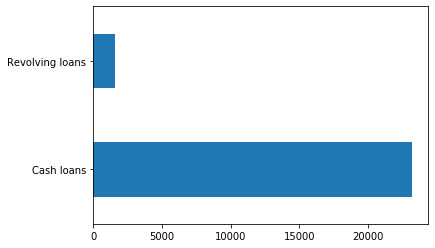

In [135]:
#NAME_CONTRACT_TYPE is an unorder categorical column
#Plotting bar graph for TARGET = 1
revised_App_Data_Target_1.NAME_CONTRACT_TYPE.value_counts().plot.barh()
plt.show()

    From the above plot we can infer that for TARGET = 1, i.e., for clients having payment difficulties, there is a huge difference between clients opting for revolving loan and cash loans.
    As per the defination, Cash debt is a loan with a set payment schedule over several months or years. After you set up your revolving loan, the lender tells you the maximum you can borrow. You can borrow money whenever you need it, pay it back on your schedule, then borrow again.
    Relatively a large number of clients (almost 14 times) have opted for Cash loans as opposed to Revolving loans. This is due to the fact, that in  cash loans you can opt for relatively large amount of money. For revolving payment, since the limit is set by lender, and would be very low as compared to limit in cash loan, hence, clients prefer cash loan. Moreover, since cash loan is one time activity and revolving loan is a recurring activity, client tend to incline towards cash loan.

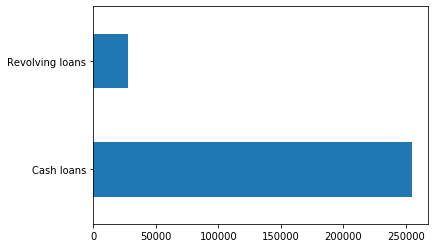

In [136]:
#Plotting bar graph for TARGET = 0
revised_App_Data_Target_0.NAME_CONTRACT_TYPE.value_counts().plot.barh()
plt.show()

    We observe a similar situation in TARGET = 0, where clients had no payment difficulties.
    Relatively a large number of clients (almost 9 times) have opted for Cash loans as opposed to Revolving loans. This is again due to the fact, that cash loans is one time payment and you can opt for relatively large amount of money. For revolving payment, since the limit is set by lender, and would be very low as compared to limit in cash loan, hence, clients prefer cash loan. Moreover, since cash loan is one time activity and revolving loan is a recurring activity, client tend to incline towards cash loan.

#### CODE_GENDER 

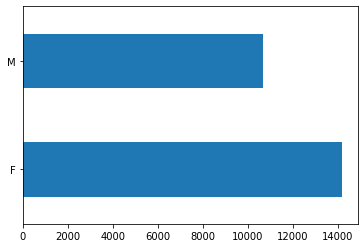

In [137]:
#CODE_GENDER is an unordered categorical column
#Plotting bar graph for TARGET = 1
revised_App_Data_Target_1.CODE_GENDER.value_counts().plot.barh()
plt.show()
#percentage plot
#count plot
#cat plot

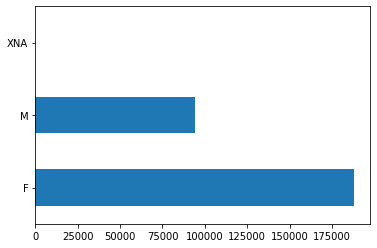

In [138]:
#Plotting bar graph for TARGET = 0
revised_App_Data_Target_0.CODE_GENDER.value_counts().plot.barh()
plt.show()

#### NAME_INCOME_TYPE

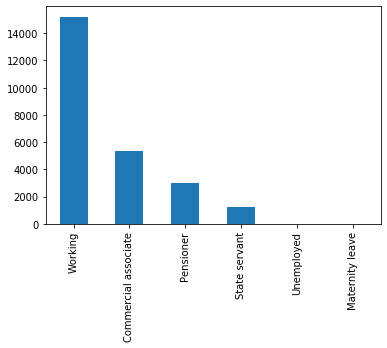

In [139]:
#CODE_GENDER is an unordered categorical column
#Plotting bar graph for TARGET = 1
revised_App_Data_Target_1.NAME_INCOME_TYPE.value_counts().plot.bar()
plt.show()
#percentage plot

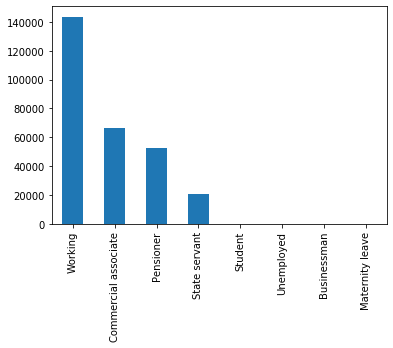

In [140]:
#Plotting bar graph for TARGET = 0
revised_App_Data_Target_0.NAME_INCOME_TYPE.value_counts().plot.bar()
plt.show()

### Ordered Categorical

#### CNT_CHILDREN

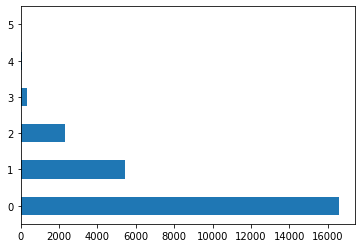

In [141]:
#NAME_CONTRACT_TYPE is an ordered categorical column
#Plotting bar graph for TARGET = 1
revised_App_Data_Target_1.CNT_CHILDREN.value_counts().plot.barh()
plt.show()
#percentage count

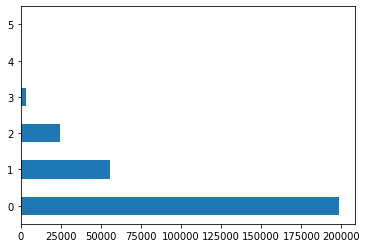

In [142]:
#Plotting bar graph for TARGET = 0
revised_App_Data_Target_0.CNT_CHILDREN.value_counts().plot.barh()
plt.show()

#### NAME_EDUCATION_TYPE

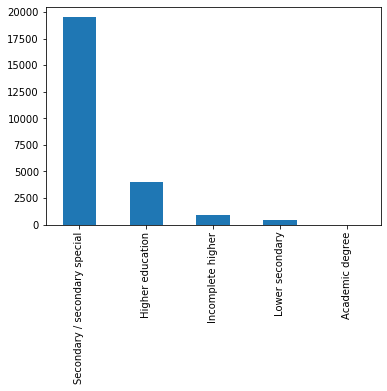

In [143]:
#NAME_EDUCATION_TYPE is an ordered categorical column
#Plotting bar graph for TARGET = 1
revised_App_Data_Target_1.NAME_EDUCATION_TYPE.value_counts().plot.bar()
plt.show()

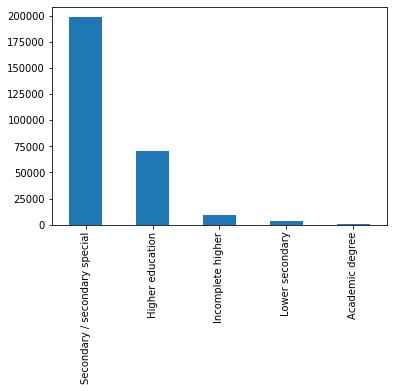

In [145]:
#Plotting bar graph for TARGET = 0
revised_App_Data_Target_0.NAME_EDUCATION_TYPE.value_counts().plot.bar()
plt.show()

### Finding correlation for each data set 

In [147]:
NumericalColumns= ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'AGE', 'DAYS_EMPLOYED']
NumericalColumns

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'REGION_POPULATION_RELATIVE',
 'AGE',
 'DAYS_EMPLOYED']

In [148]:
correlationSubsetTarget1 = revised_App_Data_Target_1[NumericalColumns]
correlationSubsetTarget0 = revised_App_Data_Target_0[NumericalColumns]

In [149]:
# Target =1 correlation
corr1= round(correlationSubsetTarget1.corr(),3)
corr1

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,AGE,DAYS_EMPLOYED
AMT_INCOME_TOTAL,1.000,0.038,0.046,0.009,-0.003,-0.015
AMT_CREDIT,0.038,1.000,0.752,0.069,0.135,-0.001
AMT_ANNUITY,0.046,0.752,1.000,0.072,0.014,-0.083
REGION_POPULATION_RELATIVE,0.009,0.069,0.072,1.000,0.048,0.015
AGE,-0.003,0.135,0.014,0.048,1.000,0.575
DAYS_EMPLOYED,-0.015,-0.001,-0.083,0.015,0.575,1.000


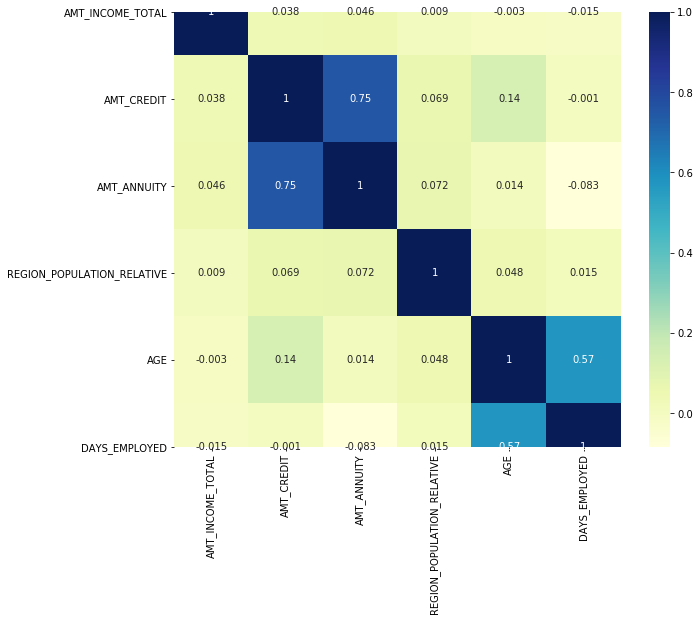

In [150]:
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(corr1, cmap="YlGnBu", annot=True)
plt.show()

In [151]:
# Target =0 correlation
corr0= round(correlationSubsetTarget0.corr(),3)
corr0

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,AGE,DAYS_EMPLOYED
AMT_INCOME_TOTAL,1.000,0.343,0.419,0.168,-0.063,-0.141
AMT_CREDIT,0.343,1.000,0.771,0.101,0.047,-0.073
AMT_ANNUITY,0.419,0.771,1.000,0.121,-0.012,-0.106
REGION_POPULATION_RELATIVE,0.168,0.101,0.121,1.000,0.025,-0.007
AGE,-0.063,0.047,-0.012,0.025,1.000,0.618
DAYS_EMPLOYED,-0.141,-0.073,-0.106,-0.007,0.618,1.000


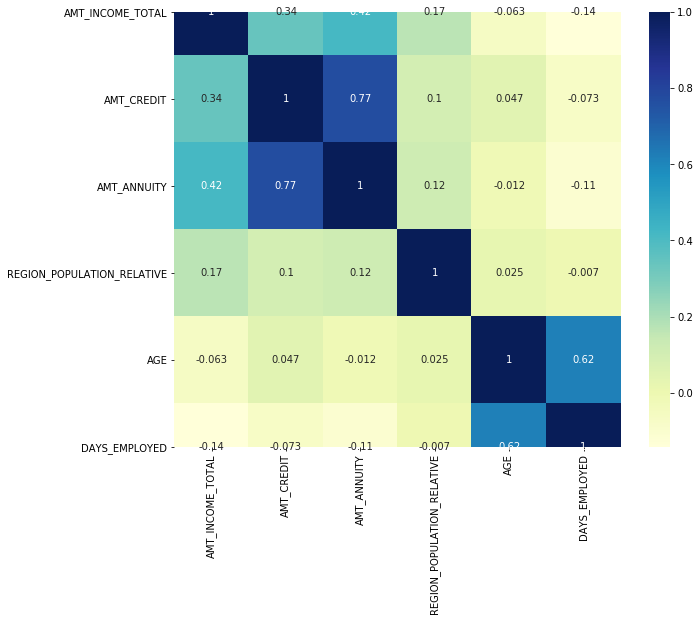

In [152]:
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(corr0, cmap="YlGnBu", annot=True)
plt.show()

### Correlation for TARGET 0

In [156]:
corrdf = corr0.where(np.triu(np.ones(corr0.shape), k=1).astype(np.bool)).unstack().reset_index()
corrdf.columns=['VAR1', 'VAR2', 'Correlation']
corrdf.dropna(subset=['Correlation'], inplace=True)
corrdf.sort_values('Correlation', ascending=False)

,VAR1,VAR2,Correlation
13,AMT_ANNUITY,AMT_CREDIT,0.771
34,DAYS_EMPLOYED,AGE,0.618
12,AMT_ANNUITY,AMT_INCOME_TOTAL,0.419
6,AMT_CREDIT,AMT_INCOME_TOTAL,0.343
18,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,0.168
20,REGION_POPULATION_RELATIVE,AMT_ANNUITY,0.121
19,REGION_POPULATION_RELATIVE,AMT_CREDIT,0.101
25,AGE,AMT_CREDIT,0.047
27,AGE,REGION_POPULATION_RELATIVE,0.025
33,DAYS_EMPLOYED,REGION_POPULATION_RELATIVE,-0.007


### Correlation for TARGET 1

In [157]:
corrdf = corr1.where(np.triu(np.ones(corr1.shape), k=1).astype(np.bool)).unstack().reset_index()
corrdf.columns=['VAR1', 'VAR2', 'Correlation']
corrdf.dropna(subset=['Correlation'], inplace=True)
corrdf.sort_values('Correlation', ascending=False)

,VAR1,VAR2,Correlation
13,AMT_ANNUITY,AMT_CREDIT,0.752
34,DAYS_EMPLOYED,AGE,0.575
25,AGE,AMT_CREDIT,0.135
20,REGION_POPULATION_RELATIVE,AMT_ANNUITY,0.072
19,REGION_POPULATION_RELATIVE,AMT_CREDIT,0.069
27,AGE,REGION_POPULATION_RELATIVE,0.048
12,AMT_ANNUITY,AMT_INCOME_TOTAL,0.046
6,AMT_CREDIT,AMT_INCOME_TOTAL,0.038
33,DAYS_EMPLOYED,REGION_POPULATION_RELATIVE,0.015
26,AGE,AMT_ANNUITY,0.014


### Observation

    AMT_CREDIT AND AMT_ANNUITY have the highest correlation in both the data sets
    These are even more correlated for target 0 i.e for the cases where there is not default

## Univariate analysis for numerical columns

#### AGE

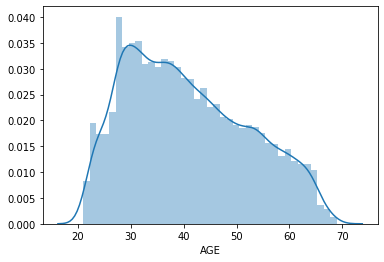

In [159]:
sns.distplot(revised_App_Data_Target_1['AGE'])

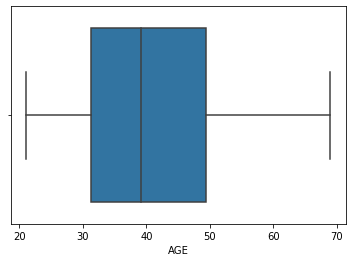

In [160]:
sns.boxplot(revised_App_Data_Target_1['AGE'])

### Observation

    Highest number of people who have applied for loan and defaulted are in age of 25-40 years.
    right skewed distribution indicates that higher age indiviuals tend to have less payment difficulties

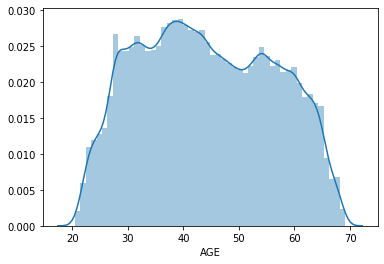

In [161]:
sns.distplot(revised_App_Data_Target_0['AGE'])

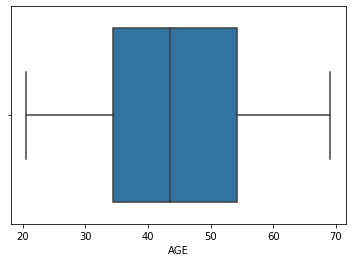

In [162]:
sns.boxplot(revised_App_Data_Target_0['AGE'])

### Observation

    For people with no payment difficulties data is relatively symmetrical.
    From given data we say that people of all ages are likely to pay back money. Therefore we should look at other parameters

#### AMT_INCOME_TOTAL

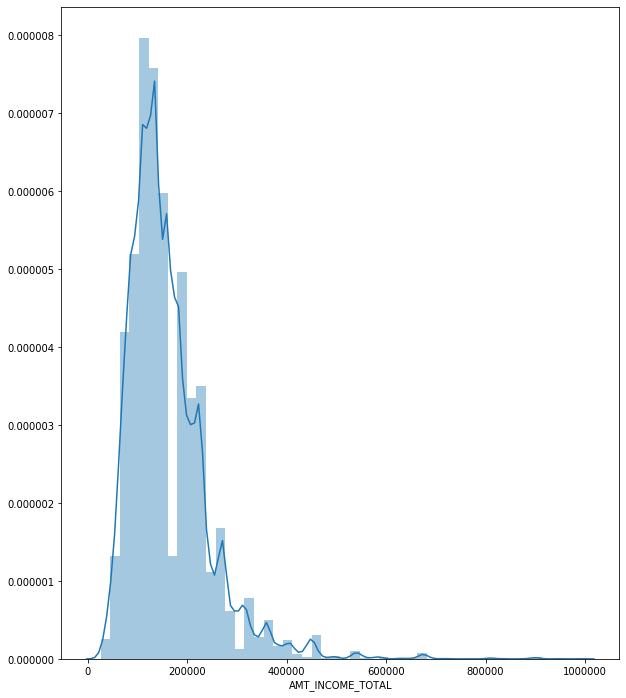

In [163]:
#TARGET = 1
plt.figure(figsize=(10,12))
sns.distplot(revised_App_Data_Target_1[revised_App_Data_Target_1['AMT_INCOME_TOTAL']<1000000]['AMT_INCOME_TOTAL'])

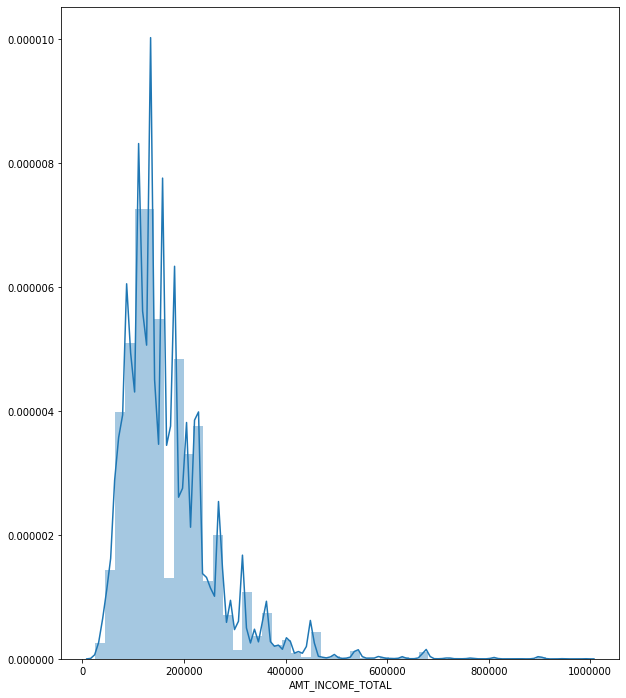

In [164]:
#TARGET = 0
plt.figure(figsize=(10,12))
sns.distplot(revised_App_Data_Target_0[revised_App_Data_Target_0['AMT_INCOME_TOTAL']<1000000]['AMT_INCOME_TOTAL'])

In [166]:
revised_App_Data_Target_1[revised_App_Data_Target_1['AMT_INCOME_TOTAL']<1000000]['AMT_INCOME_TOTAL'].describe()

count     24803.000000
mean     160230.494880
std       80991.043731
min       25650.000000
25%      112500.000000
50%      135000.000000
75%      202500.000000
max      990000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [167]:
revised_App_Data_Target_1['AMT_INCOME_TOTAL'].describe()

count    2.481600e+04
mean     1.656065e+05
std      7.468111e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.350000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

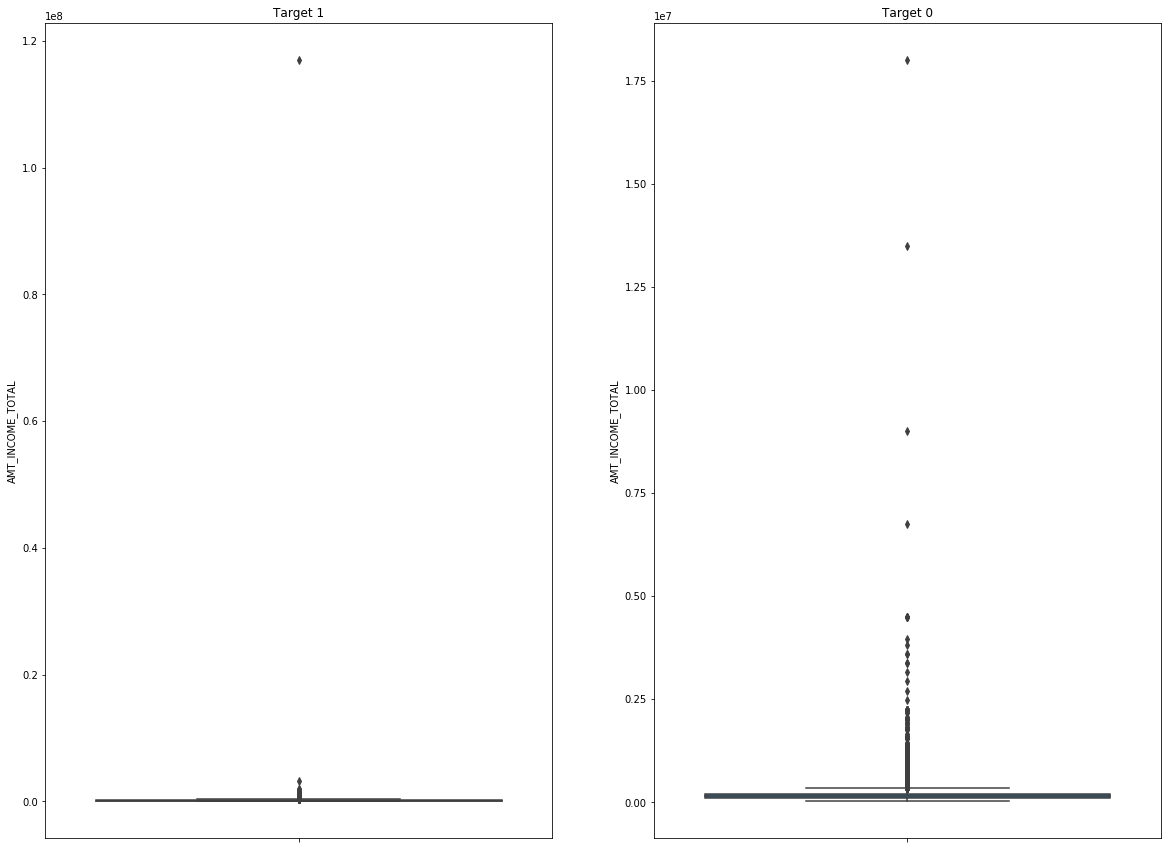

In [168]:
#For all incomes
plt.figure(figsize=(20,15))
plt.subplot(121)
plt.title('Target 1')
# plt.yscale('log')
sns.boxplot(y=revised_App_Data_Target_1['AMT_INCOME_TOTAL'])
plt.subplot(122)
plt.title('Target 0')
# plt.yscale('log')
sns.boxplot(y=revised_App_Data_Target_0['AMT_INCOME_TOTAL'])

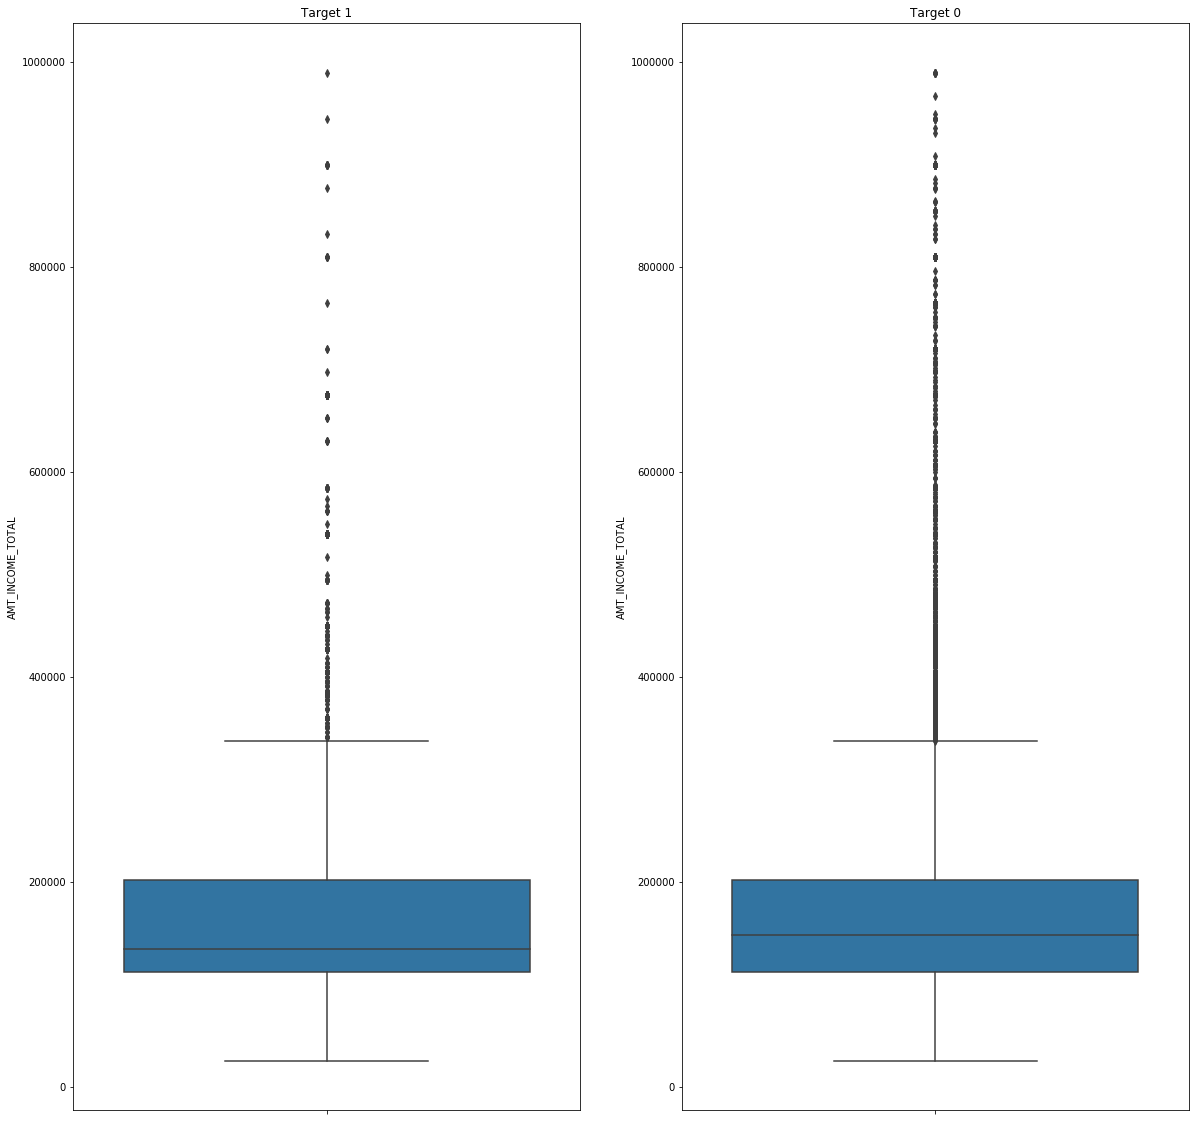

In [169]:
#Income < 1000000
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.title('Target 1')
sns.boxplot(y=revised_App_Data_Target_1[revised_App_Data_Target_1['AMT_INCOME_TOTAL']<1000000]['AMT_INCOME_TOTAL'])
plt.subplot(122)
plt.title('Target 0')
sns.boxplot(y=revised_App_Data_Target_0[revised_App_Data_Target_0['AMT_INCOME_TOTAL']<1000000]['AMT_INCOME_TOTAL'])

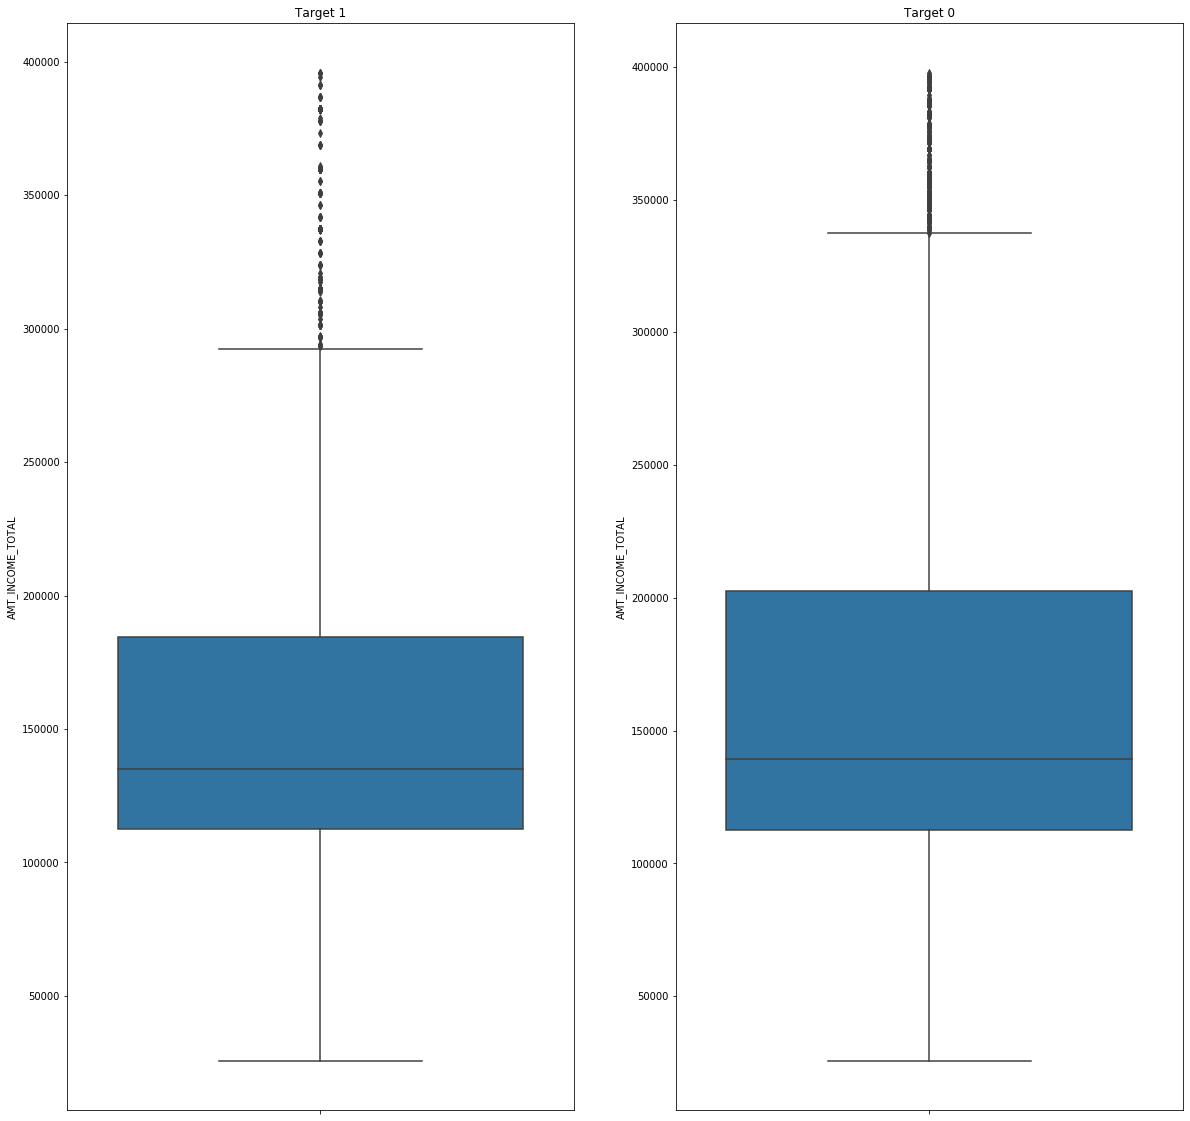

In [170]:
#for income < 400000
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.title('Target 1')
sns.boxplot(y=revised_App_Data_Target_1[revised_App_Data_Target_1['AMT_INCOME_TOTAL']<400000]['AMT_INCOME_TOTAL'])
plt.subplot(122)
plt.title('Target 0')
sns.boxplot(y=revised_App_Data_Target_0[revised_App_Data_Target_0['AMT_INCOME_TOTAL']<400000]['AMT_INCOME_TOTAL'])

### Observation for above plots 

    For people with income more than 10 lac there is very less risk of default
    People with income less than 3 lacs are most likely to face difficulties in payments
    More specifically, majority of people who faced difficulties had income between 1 lac and 2 lacs approximately

#### AMT_ANNUITY

In [171]:
revised_App_Data_Target_1['AMT_ANNUITY'].describe()

count     24816.000000
mean      26479.897848
std       12451.266136
min        2722.500000
25%       17352.000000
50%       25260.750000
75%       32976.000000
max      149211.000000
Name: AMT_ANNUITY, dtype: float64

In [172]:
revised_App_Data_Target_0['AMT_ANNUITY'].describe()

count    282641.000000
mean      27164.100221
std       14658.499000
min        1615.500000
25%       16456.500000
50%       24876.000000
75%       34749.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

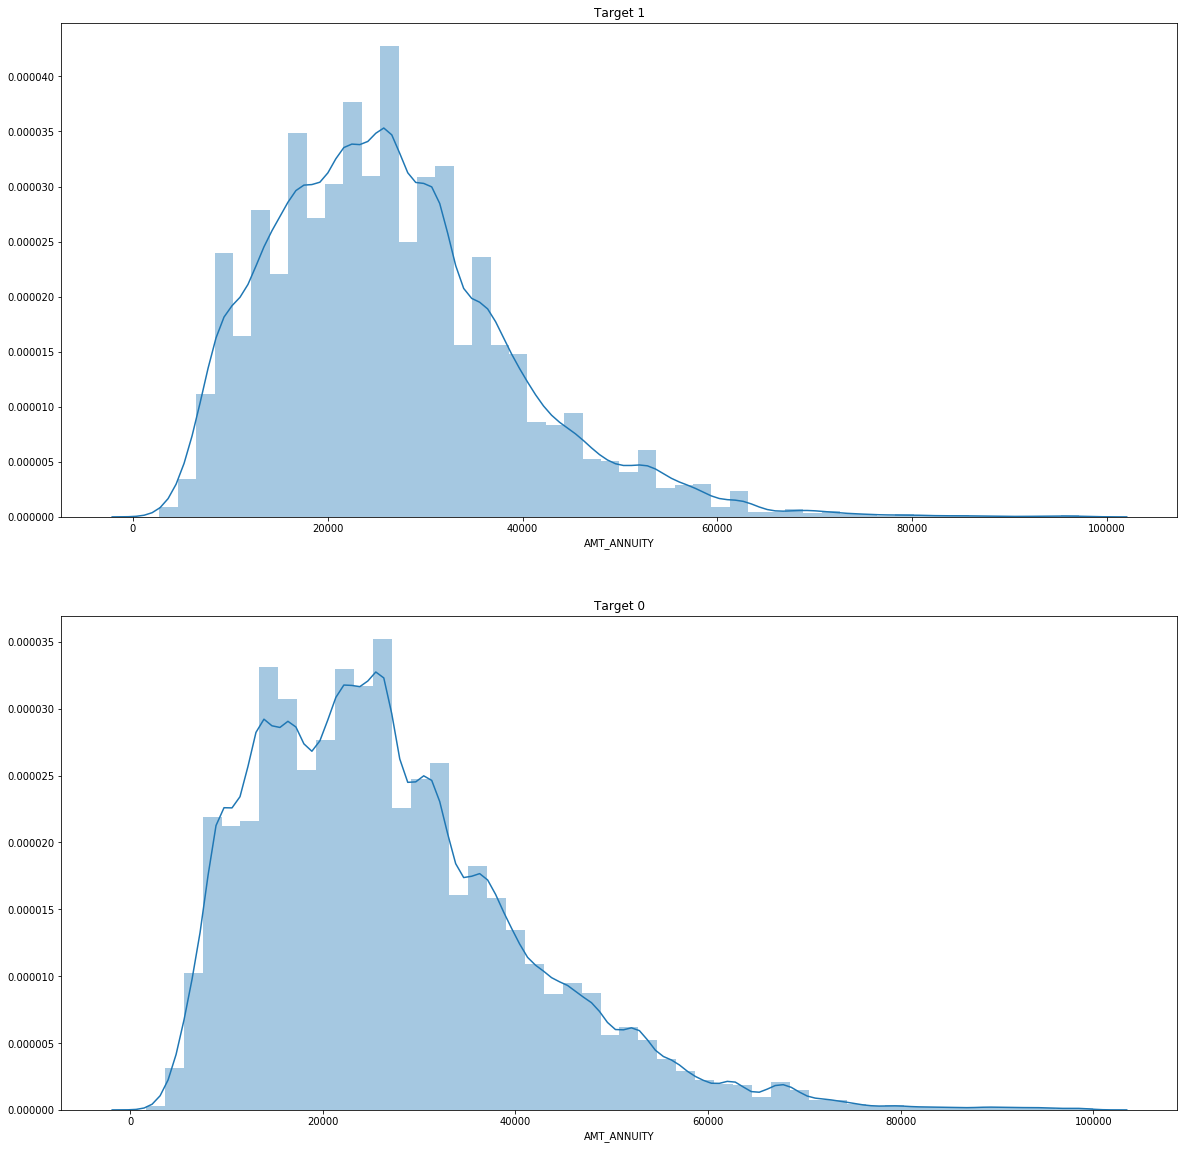

In [173]:
#for annuity < 100000
plt.figure(figsize=(20,20))
plt.subplot(211)
plt.title('Target 1')
sns.distplot(revised_App_Data_Target_1[revised_App_Data_Target_1['AMT_ANNUITY']<100000]['AMT_ANNUITY'])

plt.subplot(212)
plt.title('Target 0')
sns.distplot(revised_App_Data_Target_0[revised_App_Data_Target_0['AMT_ANNUITY']<100000]['AMT_ANNUITY'].dropna())

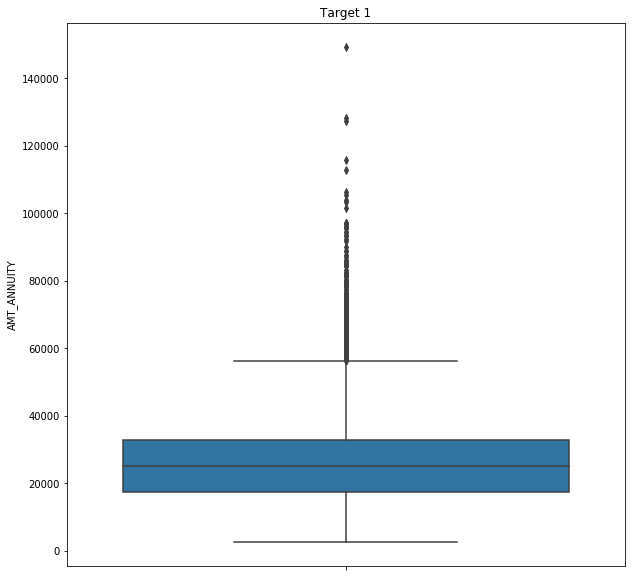

In [179]:
#for all annuity
plt.figure(figsize=(10,10))
# plt.subplot(121)
plt.title('Target 1')
sns.boxplot(y=revised_App_Data_Target_1['AMT_ANNUITY'].dropna())

# plt.subplot(122)
# plt.title('Target 0')
# sns.boxplot(y=revised_App_Data_Target_0['AMT_ANNUITY'].dropna())

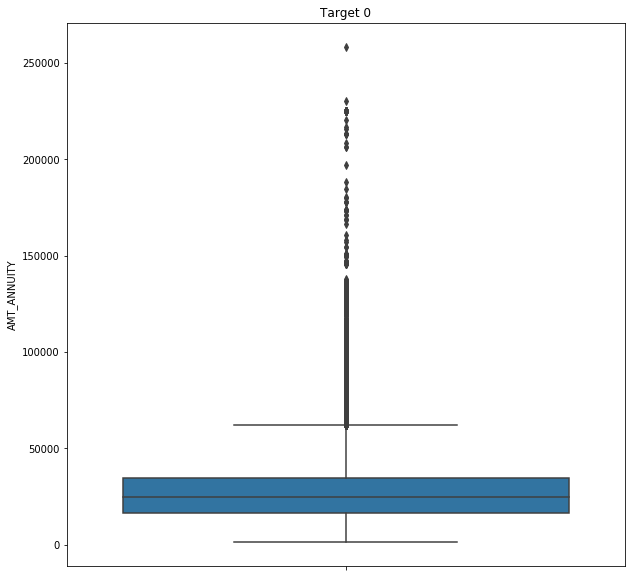

In [178]:
plt.figure(figsize=(10,10))
plt.title('Target 0')
sns.boxplot(y=revised_App_Data_Target_0['AMT_ANNUITY'].dropna())

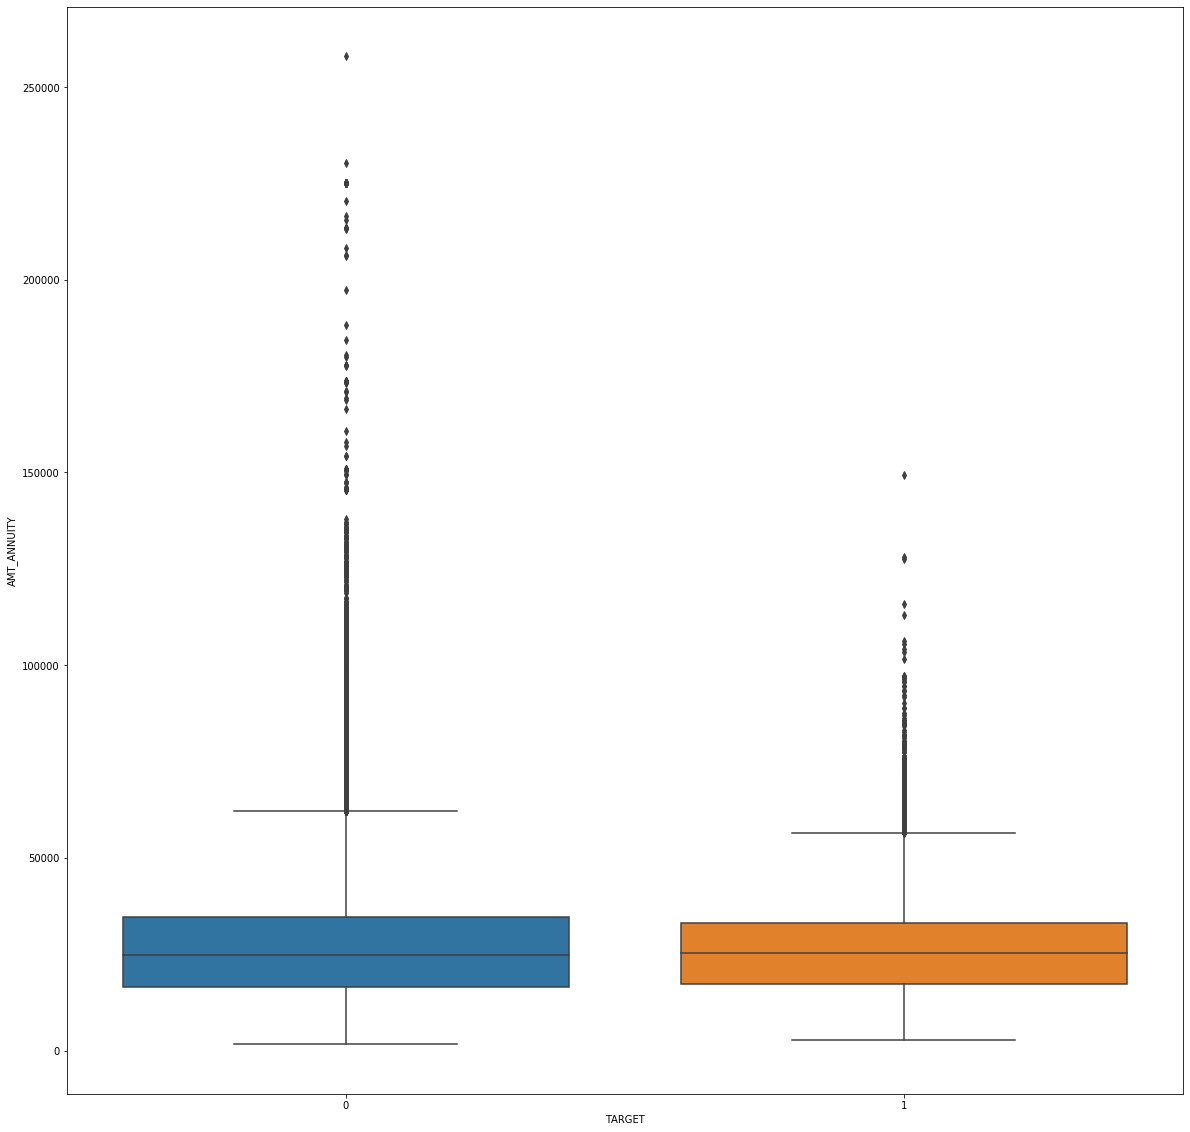

In [180]:
plt.figure(figsize=(20,20))
sns.boxplot(data=revised_Application_Data, x='TARGET', y='AMT_ANNUITY')